In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math 

Import Data, print to ensure time and velocity were asigned the correct values


In [41]:
data = np.loadtxt('s_wave_data.txt')
time_val = np.array (data[:,0])
vel_val =np.array( data[:,1])
print ("time_val:",time_val,"\nvel_val", vel_val)

time_val: [ 0.    0.01  0.02 ...  9.98  9.99 10.  ] 
vel_val [ 0.00000e+00  7.39600e-02  1.41848e-01 ... -4.90000e-05 -2.50000e-05
  0.00000e+00]


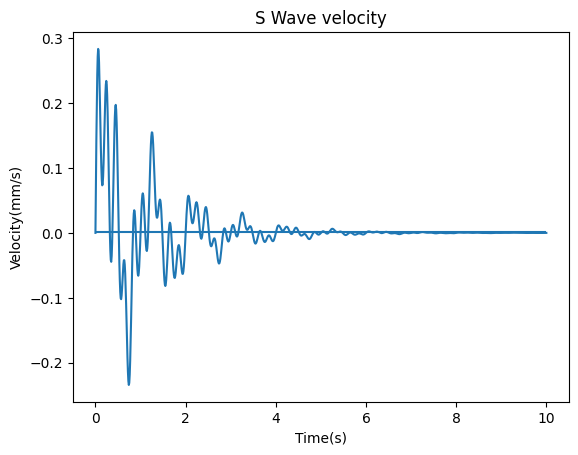

In [42]:
fig, ax =plt.subplots()
ax.plot(time_val,vel_val)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Velocity(mm/s)")
ax.set_title("S Wave velocity")
ax.hlines(max_abs_vel * 0.005,xmin=0,xmax=10)
plt.show()

In [43]:
cutoff = abs((max(vel_val))) * 0.005
print (cutoff)
print(abs(vel_val) >cutoff)
idx = max(i for i, x in enumerate(abs(vel_val)) if x >cutoff)
print (idx)
print (time_val[idx])
interval = (time_val[idx])

0.001416285
[False  True  True ... False False False]
677
6.77


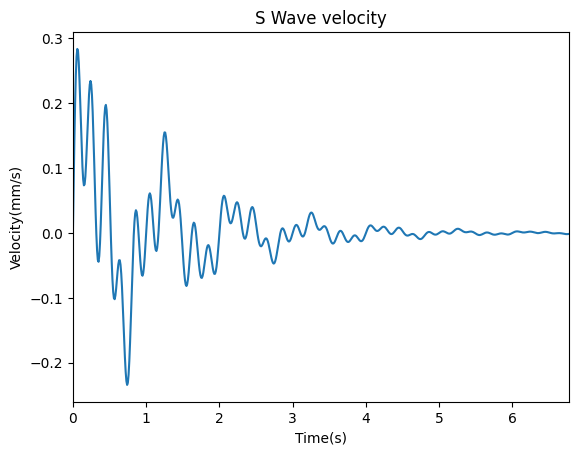

In [44]:
fig, ax =plt.subplots()
ax.plot(time_val,vel_val)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Velocity(mm/s)")
ax.set_xlim(0,interval)
ax.set_title("S Wave velocity")
plt.show()

In [54]:
def trap_rule(time_val,vel_val,idx):
    a = time_val[0]
    b = time_val[idx]
    sum1=0
    i=1
    while i < idx-1:
        sum1 += vel_val[i]
        i += 1

    integral_val = ((b-a)/(2*idx))*(vel_val[0] + 2*sum1 + vel_val[idx])
    return integral_val


In [56]:
help(np.trapezoid)

Help on _ArrayFunctionDispatcher in module numpy:

trapezoid(y, x=None, dx=1.0, axis=-1)
    Integrate along the given axis using the composite trapezoidal rule.
    
    If `x` is provided, the integration happens in sequence along its
    elements - they are not sorted.
    
    Integrate `y` (`x`) along each 1d slice on the given axis, compute
    :math:`\int y(x) dx`.
    When `x` is specified, this integrates along the parametric curve,
    computing :math:`\int_t y(t) dt =
    \int_t y(t) \left.\frac{dx}{dt}\right|_{x=x(t)} dt`.
    
    .. versionadded:: 2.0.0
    
    Parameters
    ----------
    y : array_like
        Input array to integrate.
    x : array_like, optional
        The sample points corresponding to the `y` values. If `x` is None,
        the sample points are assumed to be evenly spaced `dx` apart. The
        default is None.
    dx : scalar, optional
        The spacing between sample points when `x` is None. The default is 1.
    axis : int, optional
      

In [57]:
print (trap_rule(time_val,vel_val,idx))
print (np.trapezoid(vel_val,time_val,))

0.04236324500000005
0.04236730000000002


In [58]:
def simp_third (time_val,vel_val,idx): 
    a = time_val[0]
    b = time_val[idx]
    sum1=0
    sum2=0
    i =1
    while i<((idx/2)-1):
        sum1+= vel_val[(2*i)-1]
        sum2+= vel_val [2*i]
        i+=1
    sum1+= vel_val [(2*i)-1]

    integral_value = ((b-a)/(3*idx))*(vel_val[0] + 4*sum1 +2*sum2 + vel_val[idx])

    return(integral_value)

        

In [61]:
print(simp_third(time_val,vel_val,idx))
print(integrate.simpson(vel_val,time_val))

0.042426023333333285
0.04243042


In [ ]:
def simp_three_eight(time_val,vel_val,idx):
    a = time_val[0]
    b = time_val[idx]
    sum1=0
    sum2=0
    i =1